In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rosbag
from scipy.signal import savgol_filter
%matplotlib inline
plt.style.use('seaborn')

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
ls

log_brake_2020-07-17-10-32-41.bag  log_steer_2020-07-17-09-24-48.bag
log_brake_2020-07-17-10-37-00.bag  log_steer_2020-07-17-09-28-11.bag
log_brake_2020-07-17-10-39-43.bag  log_steer_2020-07-17-09-39-22.bag
log_steer_2020-07-17-09-16-59.bag  log_steer_2020-07-17-09-43-48.bag
log_steer_2020-07-17-09-22-11.bag  test.ipynb


# Perlakuan 1

In [3]:
bag = rosbag.Bag('log_brake_2020-07-17-10-39-43.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/LogArduino': 'ea393fd09273b840e55feba3bf682d96'}, topics={'/logging_brake': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=15544, connections=1, frequency=196.05964567849296)})

In [4]:
list_topic = []
list_msg = []
list_t = []
list_seq = []
list_t_header = []
list_current = []
list_position = []

for topic, msg, t in bag.read_messages(topics=['/logging_brake']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_seq.append(msg.header.seq)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    list_current.append(msg.brake_current)
    list_position.append(msg.brake_position)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header = np.array(list_t_header)
list_t_header -= list_t_header[0]

In [5]:
dt = list_t[1:] - list_t[:-1]
dt_header = list_t_header[1:] - list_t_header[:-1]

In [6]:
print('Sampling Rate yang digunakan di rospy adalah 250 Hz\n')
print('dt')
print('mean: {}'.format(np.mean(dt)))
print('std: {}'.format(np.std(dt)))
print('\ndt_header')
print('mean: {}'.format(np.mean(dt_header)))
print('std: {}'.format(np.std(dt_header)))

Sampling Rate yang digunakan di rospy adalah 250 Hz

dt
mean: 0.005019121722871944
std: 0.000549251057240393

dt_header
mean: 0.00501946253120949
std: 0.00014655838471031938


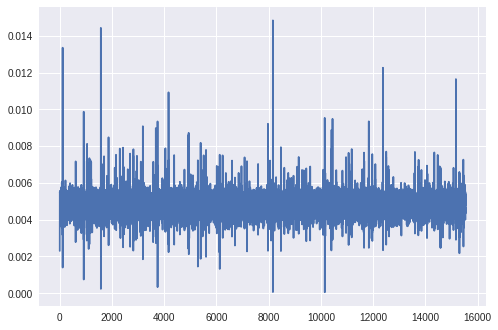

In [7]:
plt.plot(dt)

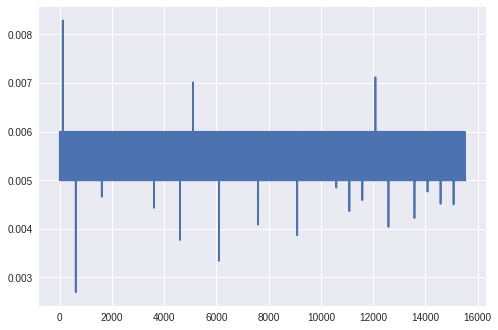

In [8]:
plt.plot(dt_header)

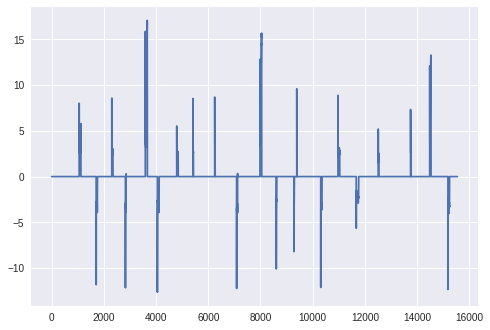

In [9]:
plt.plot(list_current)

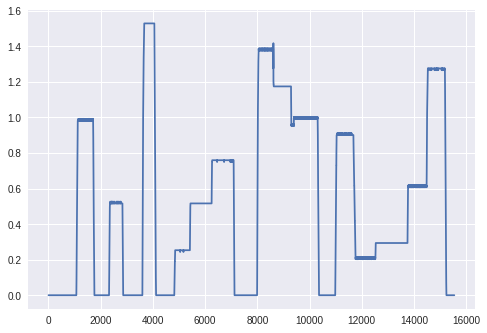

In [10]:
plt.plot(list_position)
#plt.plot(list_current)